# Plea and Offense Type Pie Charts

Importing the data, using Muneeza's code to remove samples with NANs.

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#using Muneeza's code
#read data as dataframe
data = pd.read_csv('allmn.csv')

# removes samples that contain NANs from a subset of the data 
def drop_nan(col_names, data):
    # data    : original dataframe
    # col_ids : column ids for the clean(no-nan) sub_dataset
    sub_data = data[col_names].dropna()
    return(sub_data)
    

sub = drop_nan(data.columns,data)


/Users/rachelroca/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Plea Data

First we look at pleas across the state of MN:

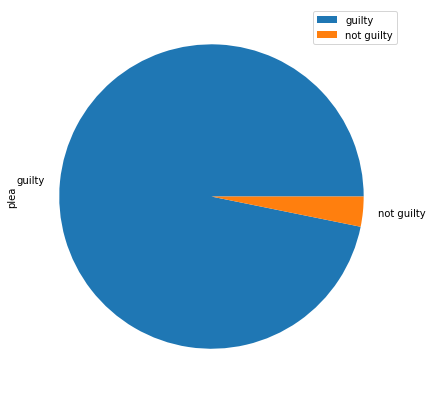

In [93]:
#pleaing guilty
plea_guilty=sub[sub["plea"]==1]
#pleaing not guilty
plea_nguilty = sub[sub["plea"]==2]
#creating the pie plot and saving
df = pd.DataFrame({'plea':[len(plea_guilty), len(plea_nguilty)]}, index=["guilty", "not guilty"])
plot = df.plot.pie(y='plea', figsize=(7, 7))
plt.savefig("plea_guilty_vs_not_guiltyMN.png")

Now we look at pleas in terms of race:

In [94]:
#making subsets of the plea_guilty data by race
#only looking at 6 races since there is only 1 race value of 7 in the data (unknown)
pg_1=plea_guilty[plea_guilty["race"]==1]
pg_2=plea_guilty[plea_guilty["race"]==2]
pg_3=plea_guilty[plea_guilty["race"]==3]
pg_4=plea_guilty[plea_guilty["race"]==4]
pg_5=plea_guilty[plea_guilty["race"]==5]
pg_6=plea_guilty[plea_guilty["race"]==6]
#making subsets of the plea_nguilty data by race
png_1=plea_nguilty[plea_nguilty["race"]==1]
png_2=plea_nguilty[plea_nguilty["race"]==2]
png_3=plea_nguilty[plea_nguilty["race"]==3]
png_4=plea_nguilty[plea_nguilty["race"]==4]
png_5=plea_nguilty[plea_nguilty["race"]==5]
png_6=plea_nguilty[plea_nguilty["race"]==6]



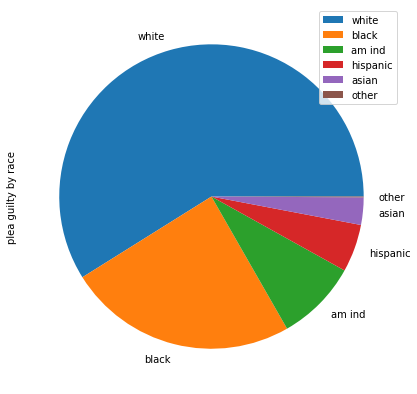

In [96]:
#creating the pie plot and saving for pleaing guilty
df = pd.DataFrame({'plea guilty by race':[len(pg_1),len(pg_2), len(pg_3), len(pg_4), len(pg_5), len(pg_6)]}, index=["white", "black", "am ind", "hispanic", "asian", "other"])
plot = df.plot.pie(y='plea guilty by race', figsize=(7, 7))
plt.savefig('plea_guilty_by_race.png')

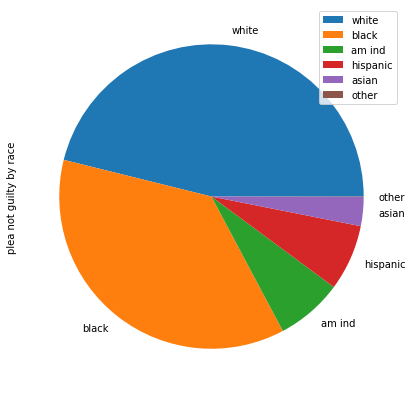

In [97]:
#creating the pie plot and saving for pleaing not guilty
df = pd.DataFrame({'plea not guilty by race':[len(png_1),len(png_2), len(png_3), len(png_4), len(png_5), len(png_6)]}, index=["white", "black", "am ind", "hispanic", "asian", "other"])
plot = df.plot.pie(y='plea not guilty by race', figsize=(7, 7))
plt.savefig('plea_not_guilty_by_race.png')

This is the breakdown across districts. We don't see anything surprising here.

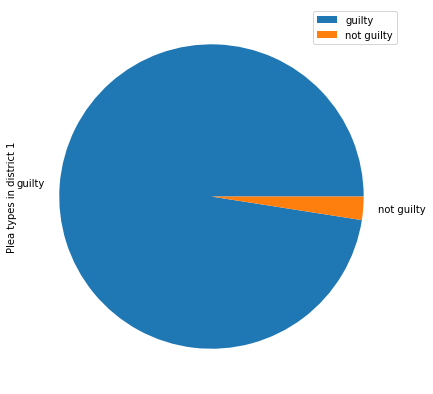

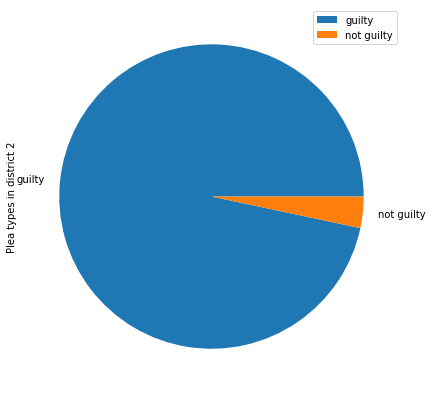

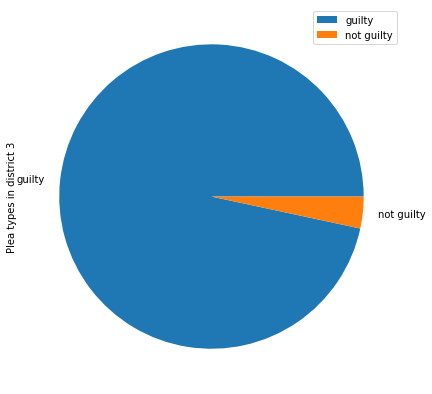

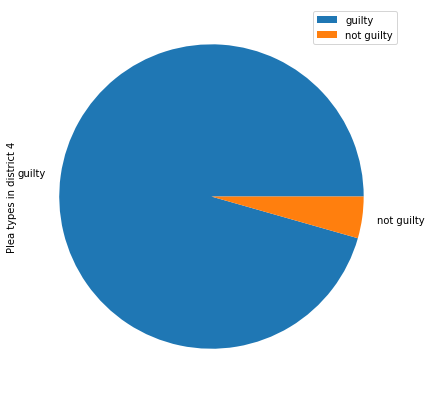

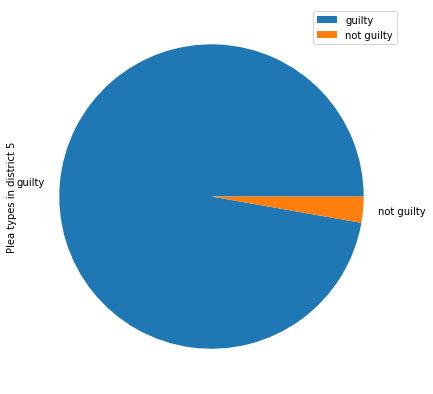

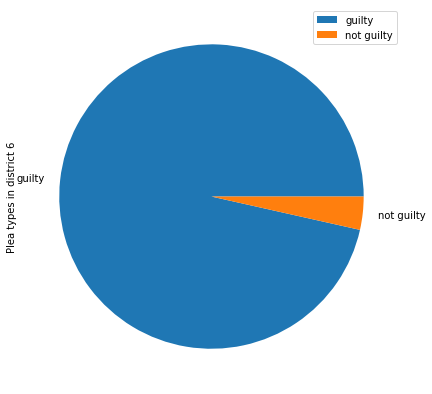

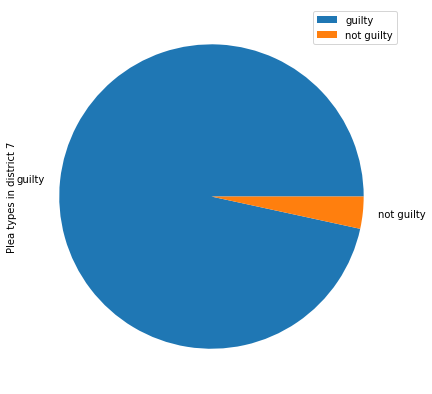

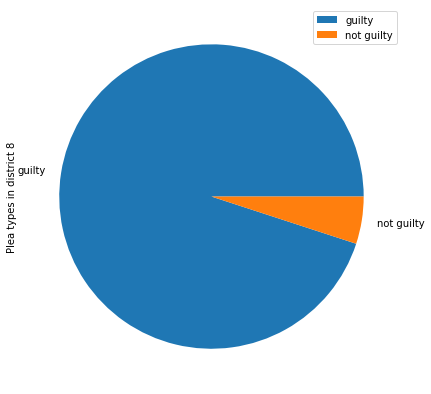

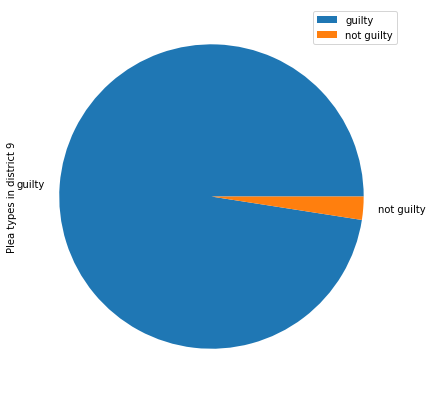

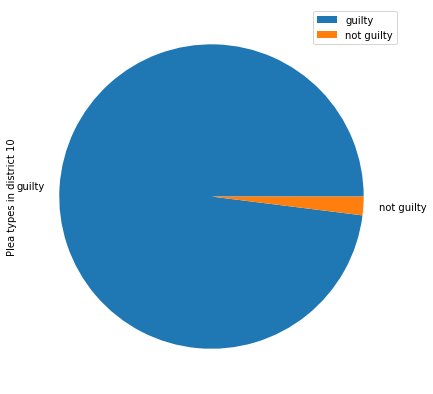

In [98]:
#looping through districts and pleas
#using +1 with indices because the values start at 1, not 0 (like python)
for j in range(10):
    dis=sub[sub["district"]==j+1]
    dis_guilty=np.zeros(2)
    for i in range(2):
        dis_guilty[i]=len(dis[dis["plea"]==i+1])
    #plotting
    df = pd.DataFrame({'Plea types in district ' + str(j+1):dis_guilty}, index=["guilty", "not guilty"])
    plot = df.plot.pie(y='Plea types in district ' + str(j+1), figsize=(7, 7))

# Offense Types

Offense types over MN as a whole.

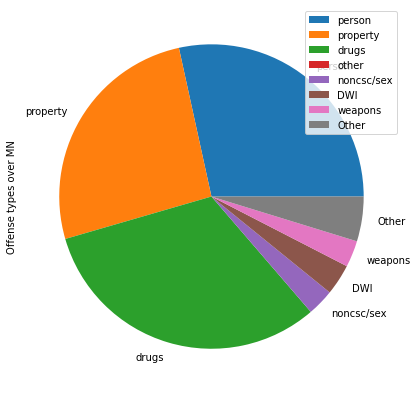

In [99]:
offense=np.zeros(8)
for i in range(8):
    offense[i]=len(sub[sub["offtype"]==i+1])
#plotting
df = pd.DataFrame({'Offense types over MN':offense}, index=["person", "property", "drugs", "other", "noncsc/sex", "DWI", "weapons", "Other"])
plot = df.plot.pie(y='Offense types over MN', figsize=(7, 7))
plt.savefig("offensetypesMN.png")

Offense type by district. It appears drug offenses are especially prevalent in rural districts.

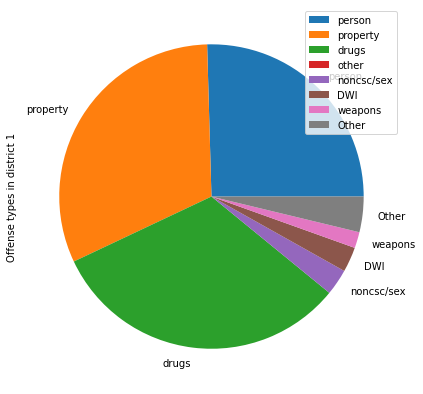

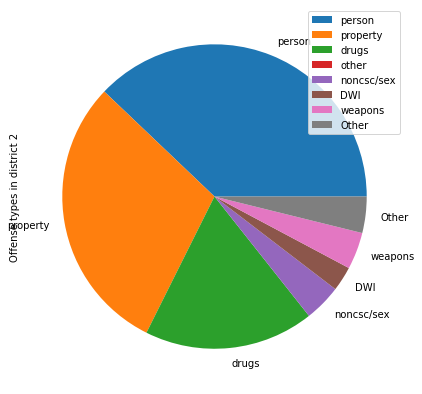

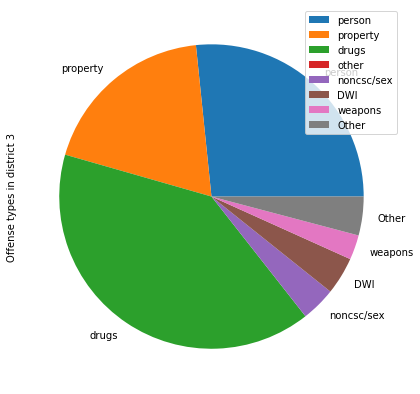

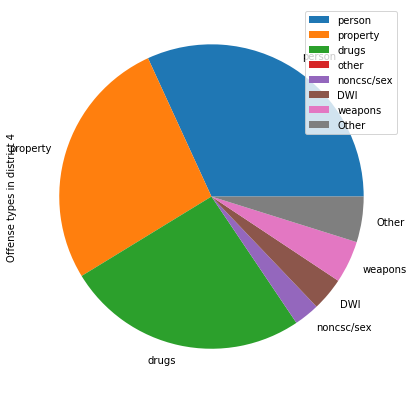

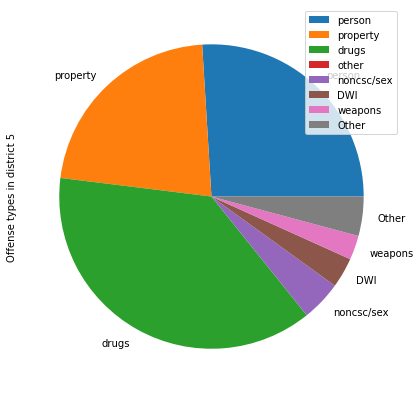

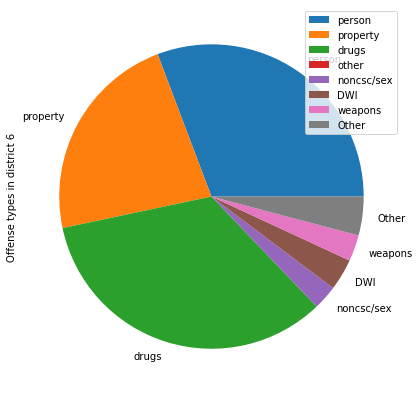

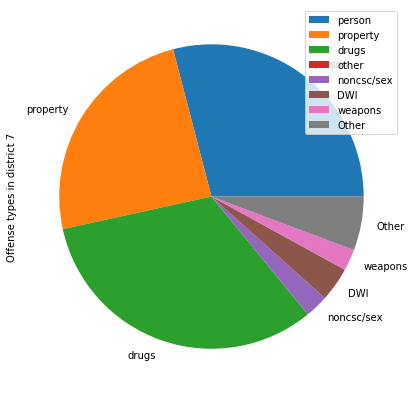

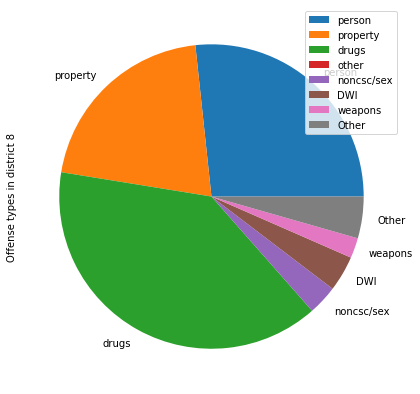

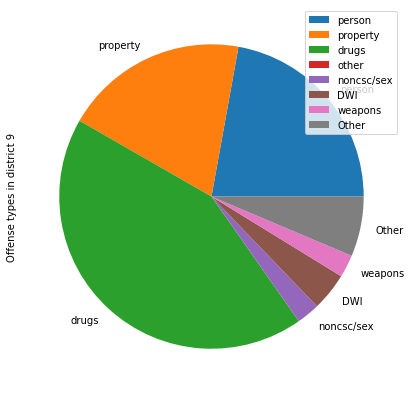

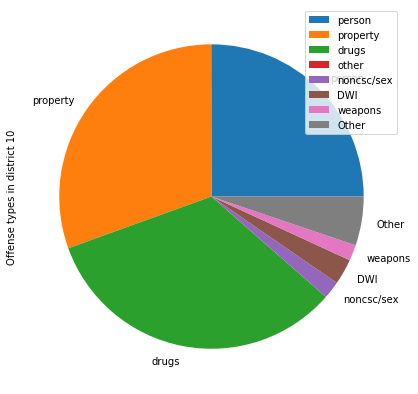

In [100]:
#looping through districts and offense types
for j in range(10):
    dis=sub[sub["district"]==j+1]
    disoffense=np.zeros(8)
    for i in range(8):
        disoffense[i]=len(dis[dis["offtype"]==i+1])
    #plotting
    df = pd.DataFrame({'Offense types in district ' + str(j+1):disoffense}, index=["person", "property", "drugs", "other", "noncsc/sex", "DWI", "weapons", "Other"])
    plot = df.plot.pie(y='Offense types in district ' + str(j+1), figsize=(7, 7))
    plt.savefig("offensetypesdistrict" + str(j+1)+".png")

Offense type based on race. Race codes: 1= white, 2= Black, 3= Am Ind, 4= Hispanic, 5 = Asian, 6= other

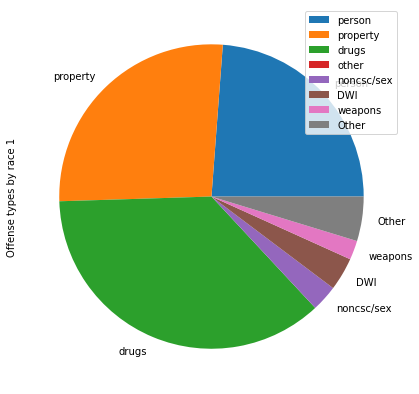

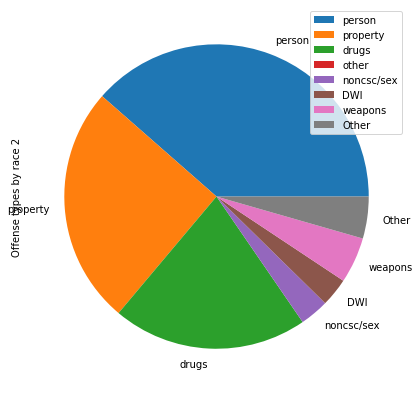

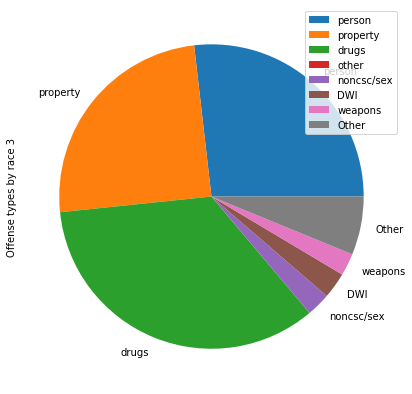

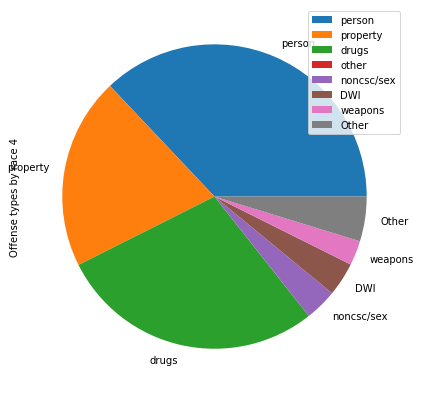

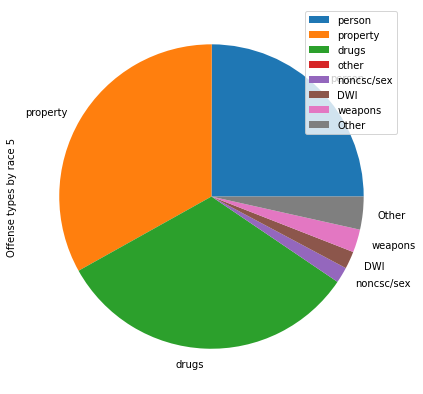

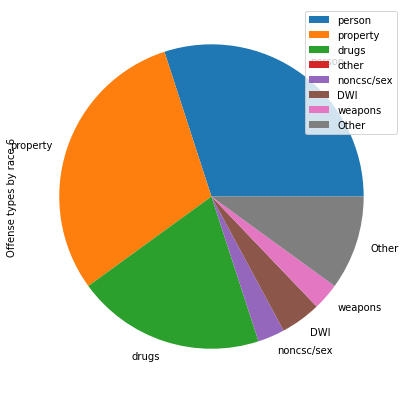

In [101]:
#looping through race and offense types
for j in range(6):
    race=sub[sub["race"]==j+1]
    raceoffense=np.zeros(8)
    for i in range(8):
        raceoffense[i]=len(race[race["offtype"]==i+1])
    df = pd.DataFrame({'Offense types by race ' + str(j+1):raceoffense}, index=["person", "property", "drugs", "other", "noncsc/sex", "DWI", "weapons", "Other"])
    plot = df.plot.pie(y='Offense types by race ' + str(j+1) , figsize=(7, 7))
    plt.savefig("offensetypesrace" + str(j+1)+".png")